<a href="https://colab.research.google.com/github/Shanandh/ServoMotor_Prediction_Using_LinearRegresiion/blob/main/ServoPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Servo Motor Prediction Using Linear Regression**

#### A Servo Motor, also known as a servo control or servo system, is a control system that uses feedback to accurately position or control the motion of a mechanical device, such as a motor or an actuator. The goal of a servo system is to maintain a desired position or trajectory by continuously monitoring the actual position and making adjustments as needed.

In Python, we can develop a servo prediction model using various libraries and techniques.

Predictive modeling is a statistical analysis of data done by computers and software with input from operators. It is used to generate possible future scenarios for entities the data used is collected from. It can be used in any industry, enterprise, or endeavor in which data is collected.


## ***Objective***

##### Servo prediction model is to predict Class of a vehicle based on its Motor, Screw, Pgain & Vgain.



##***Data Source***

The dataset is taken from GitHub which provides various dataset for practice and projects.



1.   Motor
2.   Screw
3.   Pgain
4.   Vgain
5.   Class



## ***Import Library***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ***Import Data***

In [ ]:
df = pd.read_csv(r'https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


## ***Describe Data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
df.shape

(167, 5)

In [ ]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [ ]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

## ***Data visualization***


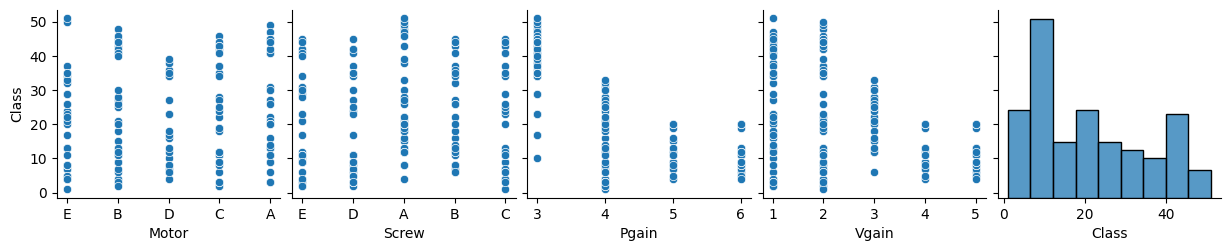

In [ ]:
sns.pairplot(df, x_vars = ['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], y_vars = ['Class'])


<Axes: xlabel='Pgain', ylabel='Class'>

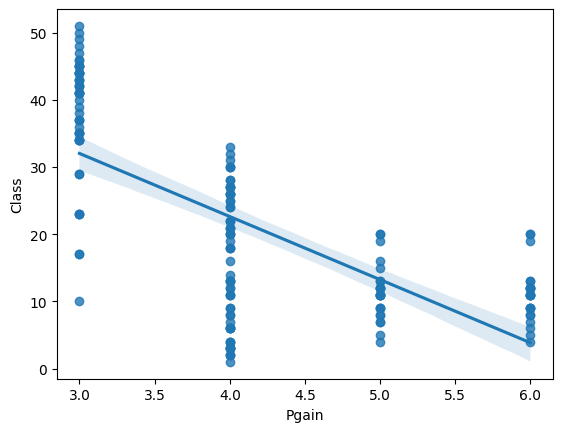

In [ ]:
sns.regplot(x = 'Pgain' , y = 'Class' , data = df)

#### **Encoding of Categorical Features**

In [ ]:
df.replace({'Motor':{'A':0, 'B':1, 'C':2, 'D':3,'E':4}},inplace = True)

In [ ]:
df.replace({'Screw':{'A':0, 'B':1, 'C':2, 'D':3,'E':4}},inplace = True)

## ***Data Preprocessing***

In [ ]:
df.corr()

,Motor,Screw,Pgain,Vgain,Class
Motor,1.000000,-0.052501,-0.037214,-0.003801,-0.112938
Screw,-0.052501,1.000000,-0.099503,0.011336,-0.162240
Pgain,-0.037214,-0.099503,1.000000,0.812268,-0.687098
Vgain,-0.003801,0.011336,0.812268,1.000000,-0.391963
Class,-0.112938,-0.162240,-0.687098,-0.391963,1.000000


## ***Define Target variable (y) & Feature variable (x)***

In [ ]:
y = df['Class']

In [ ]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [ ]:
x = df[['Motor','Screw','Pgain','Vgain']]

## ***Train Test Split***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train ,y_test = train_test_split(x,y, test_size = 0.3, random_state =2529)

In [ ]:
x_train.shape, x_test.shape ,y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

## ***Modeling: Linear Regression Model***

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

## ***Prediction***

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## ***Model Evaluation***

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [ ]:
mean_absolute_error(y_test, y_pred)

7.190539677251235

In [ ]:
r2_score(y_test, y_pred)

0.6807245170563927

## ***Explaination***

~ The Servo Prediction model is a control system that accurately positions or controls the motion of a mechanical device, such as a motor or actuator. It uses feedback to maintain a desired position or trajectory.

~ Python offers several libraries for building servo prediction models, including TensorFlow, Keras, PyTorch, and scikit-learn. These libraries provide the necessary tools and functions for data preprocessing, model training, and evaluation.

~ Building an accurate servo prediction model may involve an iterative process of collecting data, training the model, and evaluating its performance to refine and improve it.
